In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')
rootpath = '/content/drive/Shareddrives/KW phase1 repo'
import sys
sys.path.append(rootpath+'/package')
import pandas as pd
from tabulate import tabulate
import numpy as np

Mounted at /content/drive


In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
simulation_anomalyDetectionResult_AE_path = rootpath + '/datas/anomalyNewSDPResult/1215_AE/'
fileName = 'result.csv'

result_pick = {}

with open(simulation_anomalyDetectionResult_AE_path+fileName, newline='', encoding='UTF-8-sig') as f:
  rows = list(csv.reader(f))

  label = rows[0]
  contents = rows[1::1]

  for content in contents:
    _div = content[0].split("_")[0]
    _pick = content[0].split("_")[1]

    _tp = float(content[1])
    _tn = float(content[2])
    _fp = float(content[3])
    _fn = float(content[4])
    _precision = (_tp/(_tp+_fp))*100
    _recall = (_tp/(_tp+_fn))*100
    _f1 = 2*((_precision*_recall)/(_precision+_recall))

    try:
      result_pick[_pick].append([_precision, _recall, _f1])
    except:
      result_pick[_pick] = [[_precision, _recall, _f1]]

In [ ]:
with open(rootpath + '/drawHistOfDifferentPreprocessDataAE.csv', 'w') as f:
  _writer = csv.writer(f)
  for pick, data in result_pick.items():
    for v in data:
      _writer.writerow(v)

In [ ]:
import csv
MDSData = {}
PCAData = {}
AEData = {}
TSNEData = {}
SDSOCPData = {}
ranges = np.arange(0,1,0.1)
print(ranges)
keys = ['Precision','Recall','F1 Score']
with open(rootpath + '/drawHistOfDifferentPreprocessDataMDS.csv', newline='', encoding='UTF-8-sig') as csvfile:
  rows = list(csv.reader(csvfile))
  i=0
  for key in keys:
    MDSData[key] = []
    for iter in ranges:
      MDSData[key].append([float(x) for x in rows[i]])
      i+=1
with open(rootpath + '/drawHistOfDifferentPreprocessDataPCA.csv', newline='', encoding='UTF-8-sig') as csvfile:
  rows = list(csv.reader(csvfile))
  i=0
  for key in keys:
    PCAData[key] = []
    for iter in ranges:
      PCAData[key].append([float(x) for x in rows[i]])
      i+=1
# with open(rootpath + '/drawHistOfDifferentPreprocessDataAE.csv', newline='', encoding='UTF-8-sig') as csvfile:
#   rows = list(csv.reader(csvfile))
#   i=0
#   for key in keys:
#     AEData[key] = []
#     for iter in ranges:
#       AEData[key].append([float(x) for x in rows[i]])
#       i+=1
with open(rootpath + '/drawHistOfDifferentPreprocessDataTSNE.csv', newline='', encoding='UTF-8-sig') as csvfile:
  rows = list(csv.reader(csvfile))
  i=0
  for key in keys:
    TSNEData[key] = []
    for iter in ranges:
      TSNEData[key].append([float(x) for x in rows[i]])
      i+=1
with open(rootpath + '/drawHistOfDifferentPreprocessDataSDSOCP.csv', newline='', encoding='UTF-8-sig') as csvfile:
  rows = list(csv.reader(csvfile))
  i=0
  for key in keys:
    SDSOCPData[key] = []
    for iter in ranges:
      SDSOCPData[key].append([float(x) for x in rows[i]])
      i+=1

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [ ]:
datas = {"PCA-based": PCAData, "MSD-based": MDSData, "t-SNE-based": TSNEData, "Proposed": SDSOCPData}
methodOfPerformance = {}
for dataName, data in datas.items():
  performanceIndex = {}
  for key in keys:
    valueOfAnomaly = {}
    for anomalyNum in range(3):
      temp_value = []
      for value in data[key]:
        temp_value.append(value[anomalyNum])
      valueOfAnomaly[anomalyNum] = temp_value
    performanceIndex[key] = valueOfAnomaly
  methodOfPerformance[dataName] = performanceIndex

print(methodOfPerformance)

{'PCA-based': {'Precision': {0: [91.58878505, 72.05882353, 98.97959184, 36.7768595, 63.15789474, 82.90598291, 38.36206897, 81.30841121, 50.26737968, 81.30081301], 1: [95.09803922, 82.81938326, 100.0, 40.40697674, 68.21705426, 74.26160338, 31.68831169, 88.44221106, 57.73195876, 89.76744186], 2: [80.63492063, 59.03954802, 96.22641509, 21.23287671, 37.37373737, 51.57593123, 21.23287671, 78.81944444, 32.68292683, 45.24495677]}, 'Recall': {0: [98.0, 98.0, 97.0, 89.0, 96.0, 97.0, 89.0, 87.0, 94.0, 100.0], 1: [97.0, 94.0, 87.5, 69.5, 88.0, 88.0, 61.0, 88.0, 84.0, 96.5], 2: [84.66666667, 69.66666667, 85.0, 31.0, 49.33333333, 60.0, 31.0, 75.66666667, 44.66666667, 52.33333333]}, 'F1 Score': {0: [94.68599034, 83.05084746, 97.97979798, 52.04678363, 76.19047619, 89.40092166, 53.61445783, 84.05797101, 65.50522648, 89.68609865], 1: [96.03960396, 88.05620609, 93.33333333, 51.10294118, 76.8558952, 80.54919908, 41.70940171, 88.22055138, 68.43177189, 93.01204819], 2: [82.60162602, 63.91437309, 90.2654867

In [ ]:
import numpy as np

f = open(rootpath + '/drawHistOfDifferentPreprocessData_2.csv', 'w')
_writer = csv.writer(f)
_writer.writerow(["Performance Index", "Method", "Anomaly Number", "Mean of MSE", "Std of MSE"])

Precision = {}
Recall = {}
F1Score = {}

for method, performanceIndex in methodOfPerformance.items():
  for index, content in performanceIndex.items():
    for anomalyNum, values in content.items():
      meanValue = np.mean(values)
      stdValue = np.std(values)
      print("[{}] {} anomaly, {}-> mean: {}, std:{}".format(method, anomalyNum, index, meanValue, stdValue))
      if index == "Precision":
        try:
          Precision[method].append([anomalyNum, meanValue, stdValue])
        except:
          Precision[method] = [[anomalyNum, meanValue, stdValue]]
      elif index == "Recall":
        try:
          Recall[method].append([anomalyNum, meanValue, stdValue])
        except:
          Recall[method] = [[anomalyNum, meanValue, stdValue]]
      else:
        try:
          F1Score[method].append([anomalyNum, meanValue, stdValue])
        except:
          F1Score[method] = [[anomalyNum, meanValue, stdValue]]

Performance = {"Precision": Precision, "Recall": Recall, "F1 Score": F1Score}

for index, content in Performance.items():
  for anomalyNum in range(3):
    for method, data in content.items():
      _writer.writerow([index, method, data[anomalyNum][0]+1, data[anomalyNum][1], data[anomalyNum][2]])
f.close()

[PCA-based] 0 anomaly, Precision-> mean: 69.670661044, std:20.66912161480263
[PCA-based] 1 anomaly, Precision-> mean: 72.843298023, std:22.04461183923541
[PCA-based] 2 anomaly, Precision-> mean: 52.40636338, std:24.63582769961527
[PCA-based] 0 anomaly, Recall-> mean: 94.5, std:4.318564576337836
[PCA-based] 1 anomaly, Recall-> mean: 85.35, std:10.98419318839577
[PCA-based] 2 anomaly, Recall-> mean: 58.333333333999995, std:19.063636123777062
[PCA-based] 0 anomaly, F1 Score-> mean: 78.621857123, std:15.588846576700405
[PCA-based] 1 anomaly, F1 Score-> mean: 77.731095201, std:17.693449479252145
[PCA-based] 2 anomaly, F1 Score-> mean: 54.867572723, std:22.02064290508417
[MSD-based] 0 anomaly, Precision-> mean: 94.475807067, std:3.214492200665039
[MSD-based] 1 anomaly, Precision-> mean: 96.239823833, std:3.050924173018268
[MSD-based] 2 anomaly, Precision-> mean: 65.27698647999999, std:3.918502648841554
[MSD-based] 0 anomaly, Recall-> mean: 97.198989899, std:2.0387184256626196
[MSD-based] 1 a

In [ ]:
datas = [ PCAData, MDSData, TSNEData, SDSOCPData]
datasT = datas.copy()
for idata,data in enumerate(datas):
  for k,v in data.items():
    datasT[idata][k] = np.array(v).T.tolist()

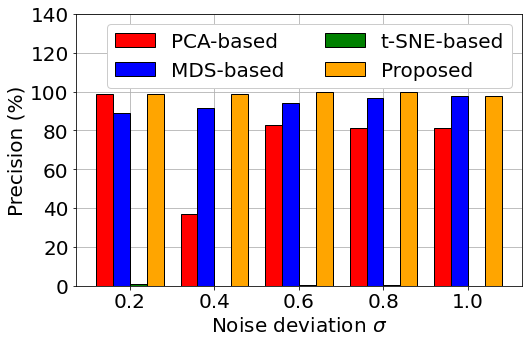

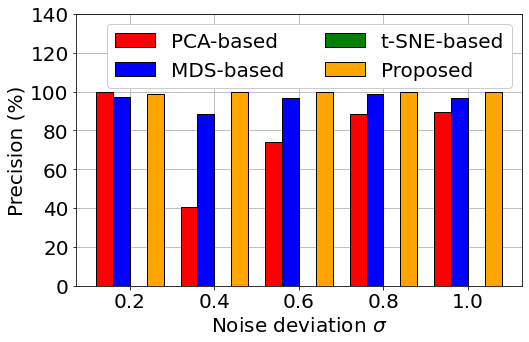

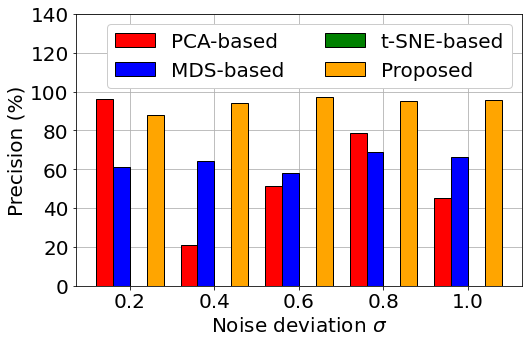

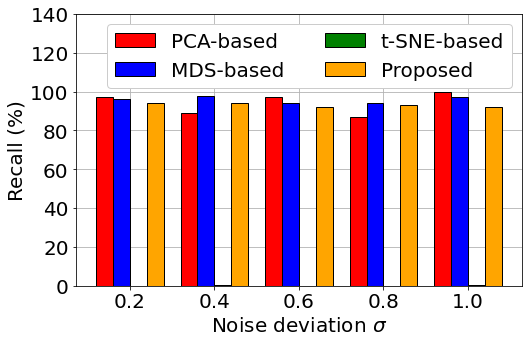

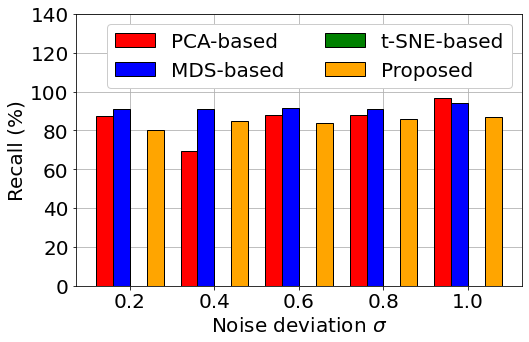

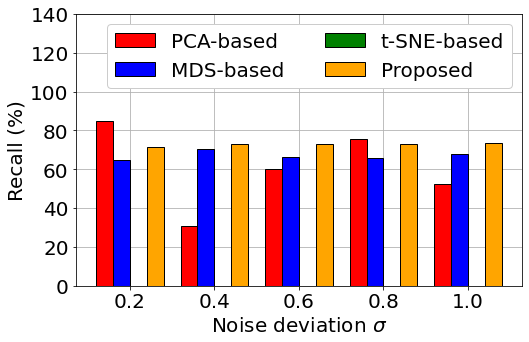

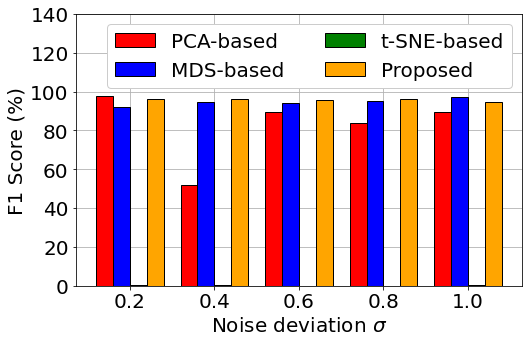

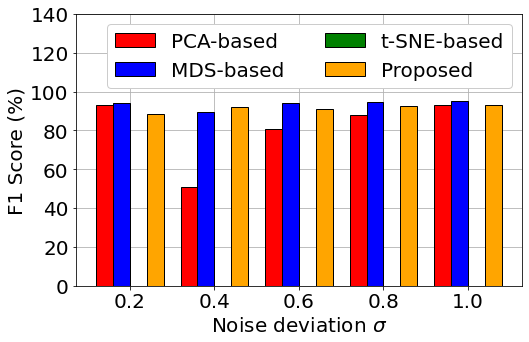

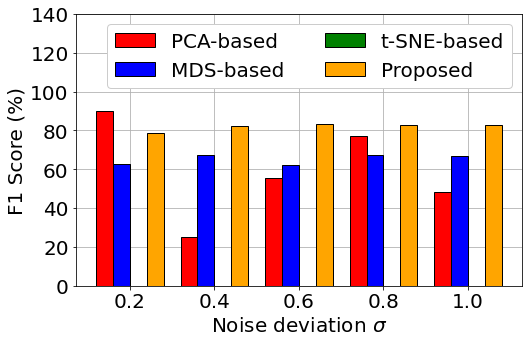

In [ ]:
from google.colab import files
labels = []
patterns = ["", "/" , "x", '\\', "-", "*"]
# colors = ["","#FF9224","#FF359A","#00CACA","#019858"]
colors = ["",'red', 'blue', 'green', 'orange']

xLabels = ["","","0.2","0.4","0.5","0.6","0.7","0.8","0.9","1.0"]
cursors = [2,3,5,7,9]
# cursors = [2,5,9]

x_labels = list(map(lambda c: xLabels[c], cursors))

barWidth = 1
iterSize = 4
padding = 1
picks = [1, 2, 3]
dataBarPadding = 2

for focusKey in keys:
  for pick in picks:
    # print("pick: ", pick)
    matplotBars = []
    fig, ax1 = plt.subplots(1,1, figsize = (8,5))
    datasLegends = ('PCA-based','MDS-based','t-SNE-based','Proposed')
    for idata, data in enumerate(datasT):

      x = np.arange(
            idata*barWidth+dataBarPadding*pick,
            idata*barWidth+(iterSize+padding)*len(data[focusKey][pick-1])+dataBarPadding*pick,
            iterSize+padding)
      _data = list(map(lambda c: data[focusKey][pick-1][c], cursors))
      # _bar = ax1.bar(x[:len(cursors)],_data,align='center', width=barWidth, label=''+str(idata+1) ,hatch=patterns[idata+1],color=colors[idata+1],edgecolor='black', zorder=3)
      _bar = ax1.bar(x[:len(cursors)],_data,align='center', width=barWidth, label=''+str(idata+1) ,color=colors[idata+1], edgecolor='black', zorder=3)
      matplotBars.append(_bar)
      ax1.grid(zorder=0)

    ax1.legend(tuple(matplotBars),datasLegends , prop={'size': 20},loc='upper right',framealpha=1, ncol=2)
    ax1.set_xlabel(r'Noise deviation $\sigma$', fontsize=20)
    ax1.set_ylabel(focusKey + " (%)", fontsize=20)
    plt.xticks(x[:len(cursors)] - (barWidth + padding/2) , x_labels)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax1.set_ylim([0, 140])

    # plt.savefig(rootpath+"/datas/anomalyNewSDPResult/"+focusKey+"_"+str (pick)+".png", dpi=300)
    this_fig = plt.gcf()
    # this_fig.savefig("anomaly_detection_comparison_{}_{}anomaly.eps".format(focusKey.replace(" ", ""), pick),bbox_inches='tight')
    # files.download("anomaly_detection_comparison_{}_{}anomaly.eps".format(focusKey.replace(" ", ""), pick))
    fig.show()

pick:  1
pick:  2
pick:  3
pick:  1
pick:  2
pick:  3
pick:  1
pick:  2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

pick:  3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

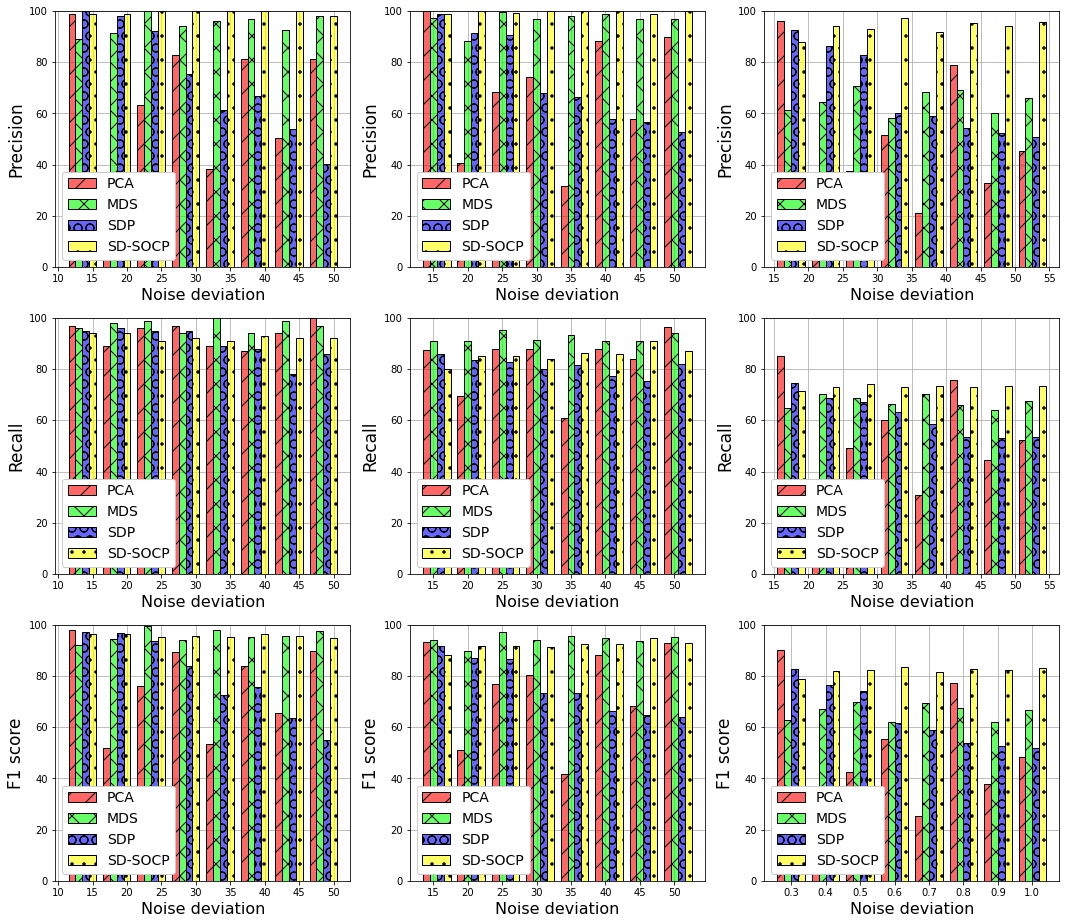

In [ ]:

labels = []
patterns = ["", "/" , "x", "O", ".", "*" ]
colors = ["","#FF000099","#00FF0099","#0000FF99","#FFFF0099"]

xLabels = ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"]

cursors = [2,3,4,5,6,7,8,9]

x_labels = list(map(lambda c: xLabels[c], cursors))


barWidth = 1
iterSize = 4
padding = 1
picks = [1, 2, 3]
dataBarPadding = 2

fig, axes = plt.subplots(len(keys),len(picks), figsize = (18,16))

for i, focusKey in enumerate(keys):
  for j, pick in enumerate(picks):
    print("pick: ", pick)
    matplotBars = []
    datasLegends = ('PCA','MDS','SDP','SD-SOCP')
    axes[i][j].set_ylim([0, 100])
    for idata, data in enumerate(datasT):
      x = np.arange(
            idata*barWidth+dataBarPadding*pick,
            idata*barWidth+(iterSize+padding)*len(data[focusKey][pick-1])+dataBarPadding*pick,
            iterSize+padding)
      x = np.array(list(map(lambda c: x[c], cursors)))
      slicedData = list(map(lambda c: data[focusKey][pick-1][c], cursors))
      _bar = axes[i][j].bar(x,slicedData,align='center', width=barWidth, label=''+str(idata+1) ,hatch=patterns[idata+1],color=colors[idata+1],edgecolor='black', zorder=3)
      matplotBars.append(_bar)
      axes[i][j].grid(zorder=0)

    axes[i][j].legend(tuple(matplotBars),datasLegends,prop={'size': 14},loc='lower left',framealpha=1)
    axes[i][j].set_xlabel('Noise deviation', fontsize=16)
    axes[i][j].set_ylabel(focusKey, fontsize=17)
    plt.xticks(x - (barWidth + padding/2) , x_labels)

plt.savefig("anomaly_detection_comparison.eps")
fig.show()